# **Pertemuan 6: Sampling Distributions**
<hr>

### By: Andreas Syaloom Kurniawan (552751)

In [6]:
# The note is written in english do to my class lecture notes was written in english, 
# therefore to make my english more fluent I also write this notebook in english.
# The code are based on R programming language

# Table of Contents
- [A. Sampling Distribution](#a)
- [B. Sample mean and sample variance](#a)
  - [B. 1 Chi-Square Distribution](#a.1)
  - [B. 2 Student t-distribution](#a.2)
  - [B. 3 F-distribution](#a.3)
- [C. The normal approximation to the binomial distribution](#a)
  - [C. 1 The normal approximation to the binomial distribution](#a.1)
  - [C. 2 Marginal Distribution Function](#a.2)
  - [C. 3 Conditional Probability Distribution](#a.3)

*Unfortunately, under github the link for the table of contents doesnt work, hence you need to scroll to the part if you want to go to a specific part of the note.*

## **A. Chebyshev Theorem**<a class="anchor" id="a"></a>
<hr>

Binomial Distribution is a probability distribution used to model the number of successes in a fixed number of independent trials, where each trial has only two possible outcomes: success or failure. 

## **B. Law of Large Number Theorem**<a class="anchor" id="a"></a>
<hr>

Binomial Distribution is a probability distribution used to model the number of successes in a fixed number of independent trials, where each trial has only two possible outcomes: success or failure. 

## **C. Central Limit Theorem**<a class="anchor" id="a"></a>
<hr>



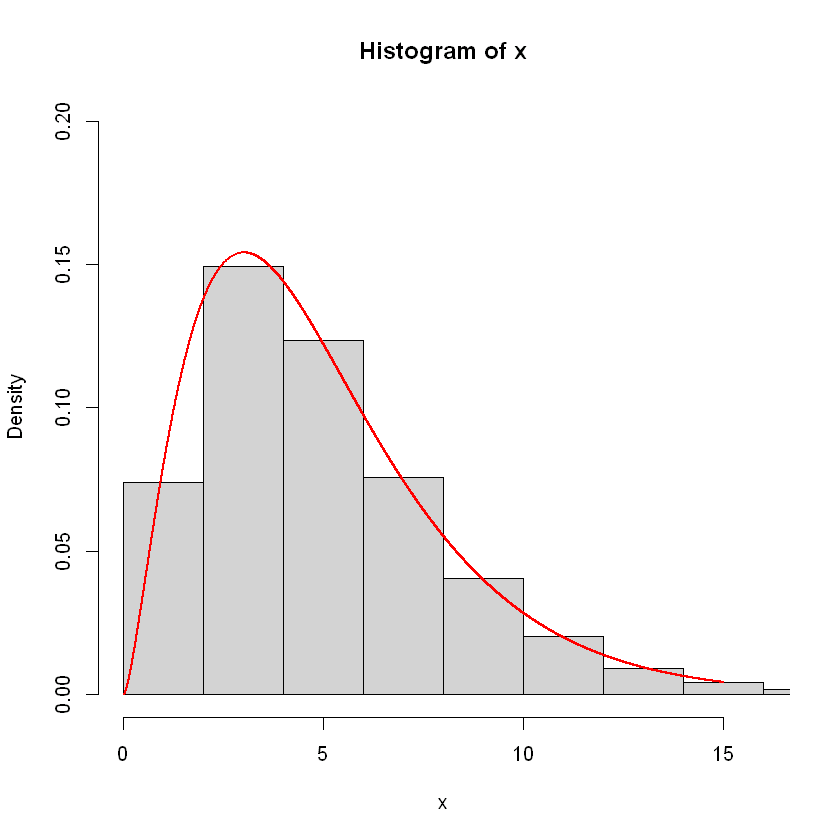

In [1]:
# computing values of 50k random values with 5 degrees of freedom
x <- rchisq(50000, df = 5)

hist(x, 
     freq = FALSE, 
     xlim = c(0,16), 
     ylim = c(0,0.2))

curve(dchisq(x, df = 5), from = 0, to = 15, 
      n = 5000, col= 'red', lwd=2, add = T)

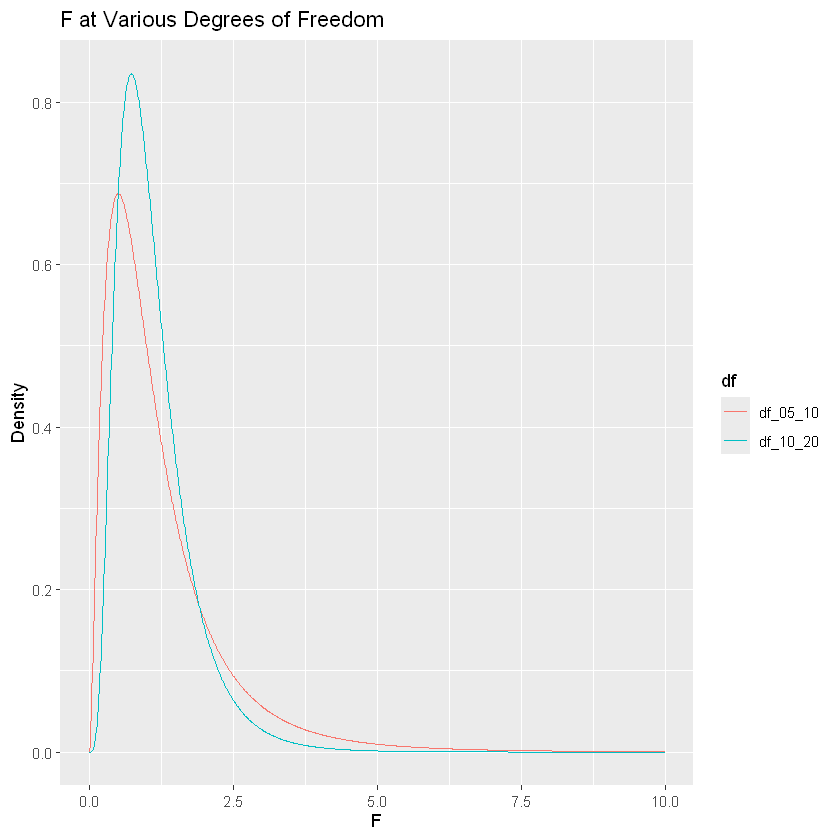

In [3]:
library(dplyr)
library(ggplot2)
library(tidyr)

data.frame(f = 0:1000 / 100) %>% 
           mutate(df_10_20 = df(x = f, df1 = 10, df2 = 20),
                  df_05_10 = df(x = f, df1 = 5, df2 = 10)) %>%
  gather(key = "df", value = "density", -f) %>%
ggplot() +
  geom_line(aes(x = f, y = density, color = df)) +
  labs(title = "F at Various Degrees of Freedom",
       x = "F",
       y = "Density")

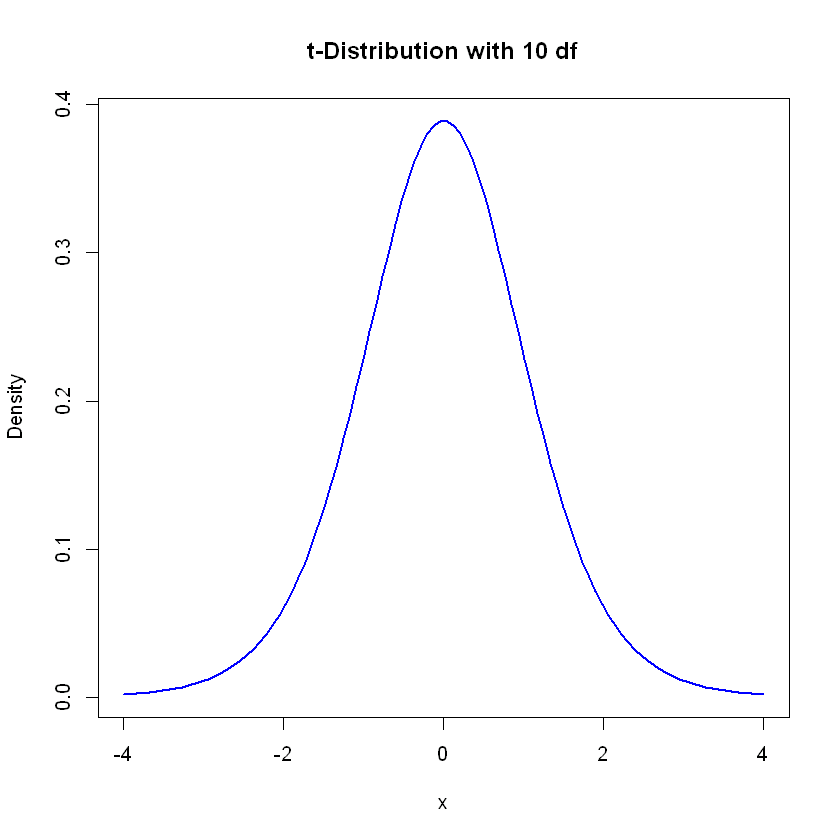

In [4]:
# Define degrees of freedom
df <- 10  

# Define range of x values
x <- seq(-4, 4, length = 100)

# Compute density
y <- dt(x, df)

# Plot the t-distribution
plot(x, y, type = "l", col = "blue", lwd = 2, 
     main = paste("t-Distribution with", df, "df"),
     xlab = "x", ylab = "Density")


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


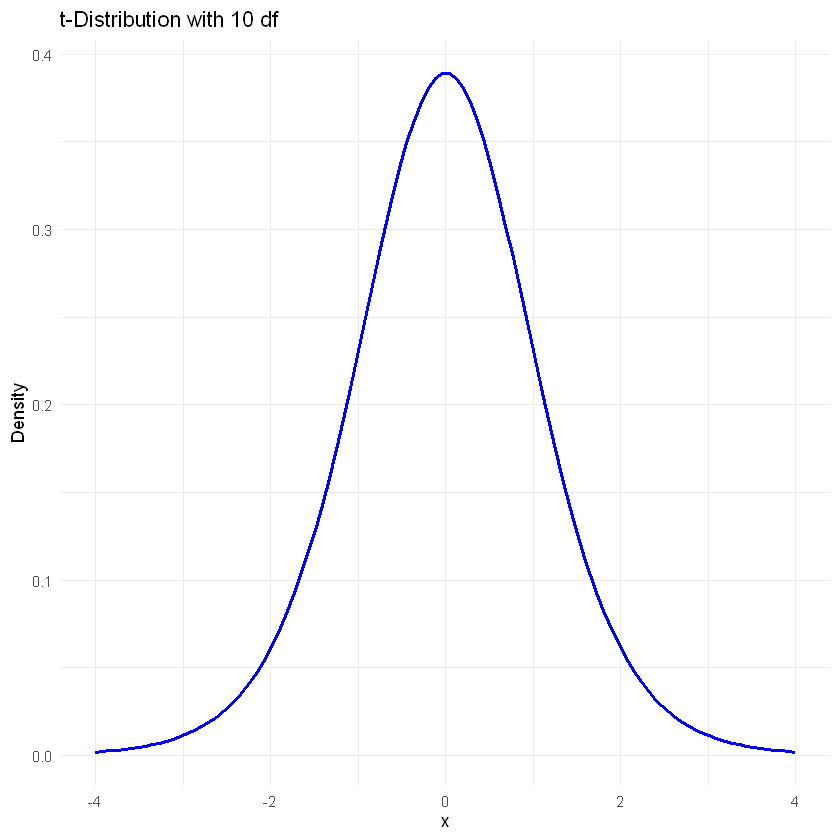

In [5]:
library(ggplot2)

# Define degrees of freedom
df <- 10  

# Create data frame
x_vals <- seq(-4, 4, length = 100)
data <- data.frame(x = x_vals, y = dt(x_vals, df))

# Plot using ggplot2
ggplot(data, aes(x = x, y = y)) +
  geom_line(color = "blue", size = 1) +
  ggtitle(paste("t-Distribution with", df, "df")) +
  xlab("x") + ylab("Density") +
  theme_minimal()


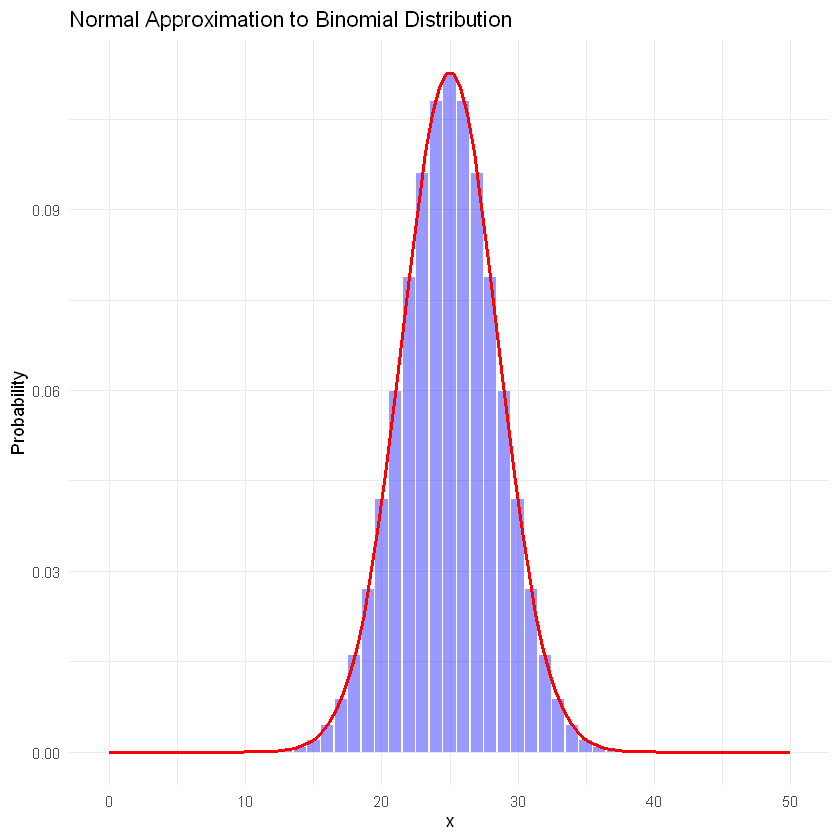

In [6]:
# Load necessary library
library(ggplot2)

# Parameters
n <- 50   # Number of trials
p <- 0.5  # Probability of success
mu <- n * p  # Mean of binomial distribution
sigma <- sqrt(n * p * (1 - p))  # Standard deviation

# Binomial probabilities
x_vals <- 0:n
binom_probs <- dbinom(x_vals, size = n, prob = p)

# Create data frame for binomial distribution
binom_data <- data.frame(x = x_vals, y = binom_probs)

# Create data for normal approximation
x_norm <- seq(min(x_vals), max(x_vals), length.out = 100)
normal_curve <- dnorm(x_norm, mean = mu, sd = sigma)

# Create data frame for normal approximation
norm_data <- data.frame(x = x_norm, y = normal_curve)

# Plot binomial distribution as bars and normal approximation as a line
ggplot() +
  geom_bar(data = binom_data, aes(x = x, y = y), stat = "identity", fill = "blue", alpha = 0.4) +
  geom_line(data = norm_data, aes(x = x, y = y), color = "red", size = 1) +
  ggtitle("Normal Approximation to Binomial Distribution") +
  xlab("x") + ylab("Probability") +
  theme_minimal()


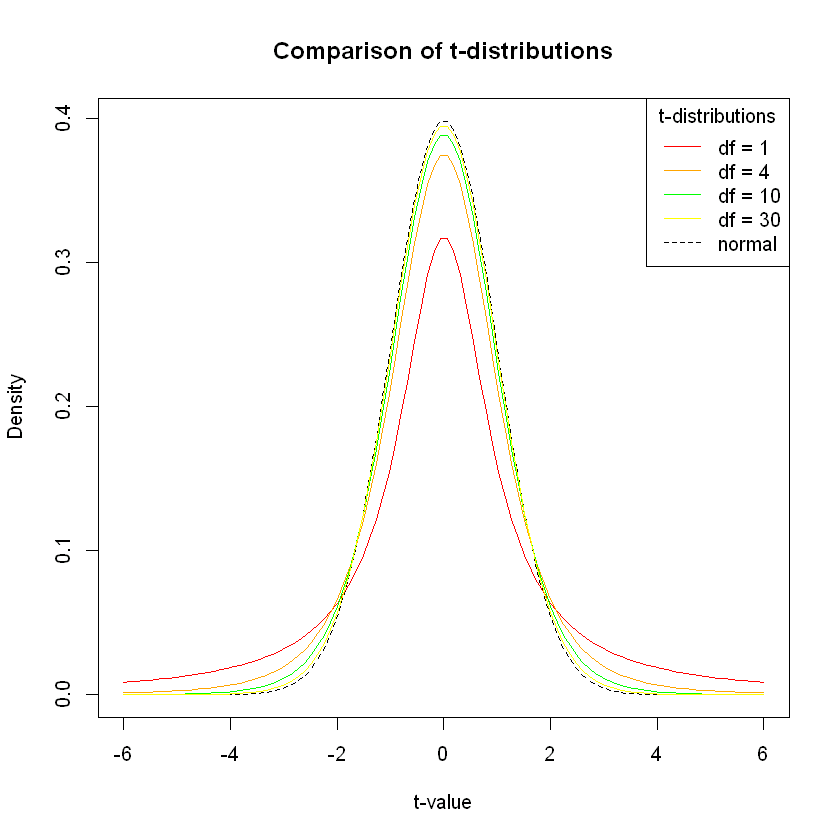

In [7]:
# Generate a vector of 100 values between -6 and 6 
x <- seq(-6, 6, length = 100) 

# Degrees of freedom 
df = c(1,4,10,30) 
colour = c("red", "orange", "green", "yellow","black") 

# Plot a normal distribution 
plot(x, dnorm(x), type = "l", lty = 2, xlab = "t-value", ylab = "Density", 
	main = "Comparison of t-distributions", col = "black") 

# Add the t-distributions to the plot 
for (i in 1:4){ 
lines(x, dt(x, df[i]), col = colour[i]) 
} 

# Add a legend 
legend("topright", c("df = 1", "df = 4", "df = 10", "df = 30", "normal"), 
	col = colour, title = "t-distributions", lty = c(1,1,1,1,2))


In [100]:
#################################################################### END #########################################################################################################